# Interpreting ResNet Model With Occlusion

This notebook loads the pretrained ResNet model given by [PaddleClas](https://github.com/PaddlePaddle/PaddleClas/tree/release/2.0) and performs image classification on selected images. 

Interpretations of the predictions are generated and visualized using Occlusion algorithm, specifically the `OcclusionInterpreter` class.

In [1]:
from PIL import Image
import paddle
import interpretdl as it
from interpretdl.data_processor.readers import read_image
from assets.resnet import ResNet50

If you have't done so, please first download the pretrained ResNet50 model by runnig the cell below or directly from [this link](https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/ResNet50_pretrained.pdparams). 
More pretrained models can be found in [PaddleClas Model Zoo](https://github.com/PaddlePaddle/PaddleClas/tree/e93711c43512a7ebcec07a0438aa87565df81084#Model_zoo_overview).

In [ ]:
# downloads and the model to assets/
!wget https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/ResNet50_pretrained.pdparams -P assets/

Initialize `paddle_model` and load weights. `ResNet50` is borrowed from PaddleClas [architectures](https://github.com/PaddlePaddle/PaddleClas/tree/e93711c43512a7ebcec07a0438aa87565df81084/ppcls/modeling/architectures).

In [2]:
MODEL_PATH = "assets/ResNet50_pretrained.pdparams"
paddle_model = ResNet50()

state_dict = paddle.load(MODEL_PATH)
paddle_model.set_dict(state_dict)

Initialize the `OcclusionInterpreter`. 

In [3]:
oc = it.OcclusionInterpreter(paddle_model, device='gpu:0')

Before interpreting the image, we first take a look at the original image.

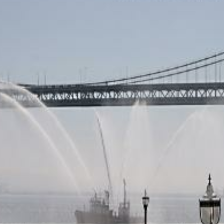

In [4]:
img_path = 'assets/fireboat.png'
x = Image.fromarray(read_image(img_path)[0])
x

Then, let Occlusion method help us `interpret` the image with respect to the predicted label. We choose to choose random baselines and perform 10 random trials. Gradients are overlayed with the original image.

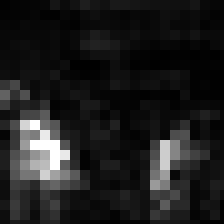

In [5]:
interpretations = oc.interpret(
        img_path,
        sliding_window_shapes=(1, 10, 10),
        labels=None,
        strides=(1, 10, 10),
        baselines=None,
        perturbations_per_eval=10,
        visual=True,
        save_path=None)

Note that `OcclusionInterpreter` also supports multiple images as inputs. They can be either processed images or a list of image filepaths. Feel free to play around with it!